======original=======


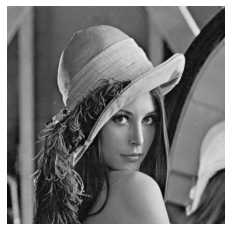

======original+noise=======


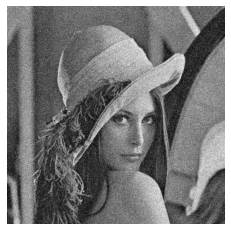

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def make_noise(shape, mode = 'gauss', mean=0, std= 25):
    noise = None
    n = shape[0]
    m = shape[1]
    c = shape[2]
    if mode == 'uniform': # generate uniform noise
        noise = np.random.uniform(-100,100,size = (n,m))
    elif mode == 'gauss':
        noise= np.random.normal(mean, std, size = (n,m)) # generate gaussian noise
    else:
        raise Exception('그딴 mode 없음') # error
    
    noise = np.repeat(noise[:,:,np.newaxis], c, axis=2) # original image의 shape length = 3 이므로
    return noise

def create_image_noise(img,noise):
    channel = img.shape[2]
    width = img.shape[1]
    height = img.shape[0]
    result = np.zeros(shape=(height,width,channel))
    for c in range(channel):
        for w in range(width):
            for h in range(height):
                pixel = img[h,w,c]+noise[h,w,c]
                if pixel>255:
                    pixel = 255
                if pixel<0:
                    pixel = 0
                result[h,w,c]=pixel
    #print(result)
    return result

print('======original=======')
original_img = Image.open('lena_grey.bmp')
img = np.array(original_img).astype('float32')
if len(img.shape)==2:
    img = np.expand_dims(img,axis=2)
    plt.imshow(original_img, cmap='gray'), plt.axis('off')
    plt.show()
else:
    plt.imshow(original_img), plt.axis('off')
    plt.show()
    
print('======original+noise=======')

noise = make_noise(img.shape)


img = create_image_noise(img,noise)

img = np.squeeze(img)

if len(img.shape)==2:
    img = Image.fromarray(img)
    plt.imshow(img, cmap='gray'), plt.axis('off')
    plt.show()
else:
    img = Image.fromarray(img.astype(np.uint8))
    plt.imshow(img), plt.axis('off')
    plt.show()



======original=======


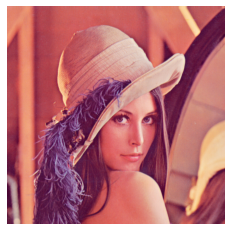

======original+noise=======


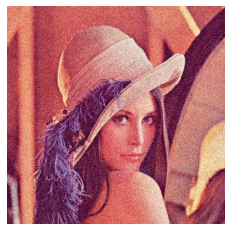

=======metric=====
MSE -> 595.9611275737736 	 PSNR -> 20.37862427688649


In [11]:
def metric(img1,img2, MAX = 255):
    if img1.shape != img2.shape:
        raise Exception('shape 맞춰주세용')
    
    ### 직관적으로 보기위해 H,W,C -> C,H,W
    
    output = np.transpose(img1,(2,0,1))
    target = np.transpose(img2,(2,0,1))
    
    height = img1.shape[0]
    width = img1.shape[1]
    channel = img1.shape[2]
    mse = 0
    
    
    for c in range(channel):
        mse += ((output[c,:,:]-target[c,:,:])**2).sum()
    mse= mse/(height*width*channel + 1e-9)
    psnr = 10 * np.log10((MAX**2)/(mse+1e-9))
    return mse, psnr

print('======original=======')
original_img = Image.open('lena.bmp')
img = np.array(original_img).astype('float32')
if len(img.shape)==2:
    img = np.expand_dims(img,axis=2)
    plt.imshow(original_img, cmap='gray'), plt.axis('off')
    plt.show()
else:
    plt.imshow(original_img), plt.axis('off')
    plt.show()
    
print('======original+noise=======')

noise = make_noise(img.shape)
noise_img = create_image_noise(img,noise)
mse, psnr = metric(img, noise_img)
noise_img = np.squeeze(noise_img)

if len(noise_img.shape)==2:
    noise_img = Image.fromarray(noise_img)
    plt.imshow(noise_img, cmap='gray'), plt.axis('off')
    plt.show()
else:
    
    noise_img = Image.fromarray(noise_img.astype(np.uint8))
    plt.imshow(noise_img), plt.axis('off')
    plt.show()

print('=======metric=====')
print('MSE -> {} \t PSNR -> {}'.format(mse,psnr))

In [8]:
import numpy as np
from PIL import Image
import cv2

def generate_filter(k,mean = 0, std=1):
    if k%2==0:
        raise Exception('짝수 X')
    size = (k,k)
    gauss_filter = np.zeros(size)
    mid = (k-1)//2
    
    # mean = 0 이라 가정
    
    for i in range(k):
        for j in range(k):
            gauss_filter[i,j] = np.exp(-((((i-mid)**2) + ((j-mid)**2))/(2*(std**2))))
    K = gauss_filter.sum()
    
    return gauss_filter/K

print(generate_filter(3))
import cv2


kernel1d = cv2.getGaussianKernel(3, 1) 
kernel2d = np.outer(kernel1d, kernel1d.transpose())
print(kernel2d)

[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


In [3]:
def padding(img,P):
    
    #def generate_matrix(i,j,p,arr):
        # i-p ~ i+p
    N = img.shape[0]
    channel  = img.shape[2]
    size = (N+2*P, N+2*P,channel)
    result = -np.ones(size)
    result[P:N+P,P:N+P,:] = img[:,:,:]
    dy = [0,-1,1,0,1,-1,1,-1]
    dx = [-1,0,0,1,1,-1,-1,1]
    for y in range(P,N+P):
        for x in range(P,N+P):
            if y==P or y==N+P-1 or x==P or x==N+P-1:
                for k in range(1,P+1):
                    for i in range(8):
                        ny = y + dy[i]*k
                        nx = x + dx[i]*k
                        for c in range(channel):
                            if result[ny][nx][c]==-1:
                                result[ny][nx][c] = result[ny-2*dy[i]*k][nx-2*dx[i]*k][c]
                                

    return result
    


print('======original=======')
original_img = Image.open('lena.bmp')
img = np.array(original_img).astype(np.float32)

if len(img.shape)==2:
    print('original_img shape : {}'.format(img.shape))
    img = np.expand_dims(img,axis=2)
    plt.imshow(original_img, cmap='gray'), plt.axis('off')
    plt.show()
else:
    print('original_img shape : {}'.format(img.shape))
    plt.imshow(original_img), plt.axis('off')
    plt.show()
    
print('======padding=======')
P=10
pad_img = padding(img,P)
pad_img = np.squeeze(pad_img)

if len(pad_img.shape)==2:
    print('pad_img shape : {}'.format(pad_img.shape))
    pad_img = Image.fromarray(pad_img)
    plt.imshow(pad_img, cmap='gray'), plt.axis('off')
    plt.show()
else:
    print('pad_img shape : {}'.format(pad_img.shape))
    pad_img = Image.fromarray(pad_img.astype(np.uint8))
    plt.imshow(pad_img), plt.axis('off')
    plt.show()


    

======original=======
original_img shape : (512, 512, 3)


NameError: name 'plt' is not defined

======original=======
original_img shape : (512, 512, 3)


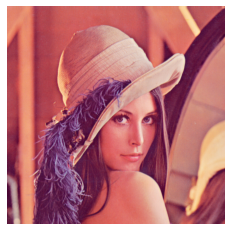

======solution=======
filter size -> (3, 3, 3)
result_img shape : (512, 512, 3)


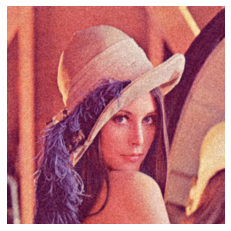

MSE -> 102.79706149147765 	 PSNR -> 28.010996605650924


In [16]:
from PIL import Image
import matplotlib.pyplot as plt

def solution(img, K):
    N = img.shape[0]
    channel = img.shape[2]
    filters = generate_filter(K)
    filters = np.repeat(filters[:,:,np.newaxis],channel,axis=2)
    print('filter size -> {}'.format(filters.shape))
    result = np.zeros((N-(K-1),N-(K-1),channel))
    
    
    for i in range(N-(K-1)):
        for j in range(N-(K-1)):
            for c in range(channel):
                result[i,j,c]+=(np.sum(np.multiply(img[i:i+K,j:j+K,c], filters[:,:,c])))
    return result




print('======original=======')
original_img = Image.open('lena.bmp')
img = np.array(original_img).astype(np.float32)

if len(img.shape)==2:
    print('original_img shape : {}'.format(img.shape))
    img = np.expand_dims(img,axis=2)
    plt.imshow(original_img, cmap='gray'), plt.axis('off')
    plt.show()
else:
    print('original_img shape : {}'.format(img.shape))
    plt.imshow(original_img), plt.axis('off')
    plt.show()

print('======solution=======')

K=3
P = (K-1)//2
noise = make_noise(img.shape)
noise_img = create_image_noise(img,noise)
pad_img = padding(noise_img,P)

result_img = solution(pad_img,K)

print('result_img shape : {}'.format(result_img.shape))
mse, psnr = metric(img, result_img)
result_img = np.squeeze(result_img)

if len(result_img.shape)==2:
    result_img = Image.fromarray(result_img)
    plt.imshow(result_img, cmap='gray'), plt.axis('off')
    plt.show()
else:
    result_img = Image.fromarray(result_img.astype(np.uint8))
    plt.imshow(result_img), plt.axis('off')
    plt.show()
    
print('MSE -> {} \t PSNR -> {}'.format(mse,psnr))